In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [11]:
quality_df = pd.read_excel('Data_Model_IoTMLCQ_2024.xlsx')
quality_df

,Datetime,Month,Average Fish Weight (g),Survival Rate (%),Disease Occurrence (Cases),Temperature (°C),Dissolved Oxygen (mg/L),pH,Turbidity (NTU),Month_Num,...,day,hour,oxigeno_scaled,ph,turbidez,Oxygenation Automatic,Corrective Measures,Thermal Risk Index,Low Oxygen Alert,Health Status
0,2024-01-01 00:00:00,January,275.82,95.27,2.0,27.47,6.34,7.98,3.30,1.0,...,1.0,0.0,8.355273,0.387898,0.020505,Yes,No,Normal,Safe,Stable
1,2024-01-01 01:00:00,January,275.82,95.27,2.0,27.47,6.34,7.98,3.30,1.0,...,1.0,1.0,8.256397,0.343950,0.108561,No,No,Normal,Safe,Stable
2,2024-01-01 02:00:00,January,275.82,95.27,2.0,27.47,6.34,7.98,3.30,1.0,...,1.0,2.0,8.511549,0.365285,0.410457,Yes,No,Normal,Safe,Stable
3,2024-01-01 03:00:00,January,275.82,95.27,2.0,27.47,6.34,7.98,3.30,1.0,...,1.0,3.0,8.362301,0.189601,0.891217,No,No,Normal,Safe,Stable
4,2024-01-01 04:00:00,January,275.82,95.27,2.0,27.47,6.34,7.98,3.30,1.0,...,1.0,4.0,8.003350,0.318775,0.936614,Yes,No,Normal,Safe,Stable
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4378,2024-07-01 10:00:00,July,262.82,92.85,1.0,27.45,7.72,7.88,3.71,6.0,...,28.0,5.0,8.307432,0.360661,0.014110,Yes,No,Normal,Safe,Stable
4379,2024-07-01 11:00:00,July,262.82,92.85,1.0,27.45,7.72,7.88,3.71,6.0,...,28.0,5.0,8.307432,0.360661,0.014110,No,No,Normal,Safe,Stable
4380,2024-07-01 12:00:00,July,262.82,92.85,1.0,27.45,7.72,7.88,3.71,6.0,...,28.0,5.0,8.307432,0.360661,0.014110,Yes,No,Normal,Safe,Stable
4381,2024-07-01 13:00:00,July,262.82,92.85,1.0,27.45,7.72,7.88,3.71,6.0,...,28.0,5.0,8.307432,0.360661,0.014110,No,No,Normal,Safe,Stable


In [12]:
quality_df.isnull()

,Datetime,Month,Average Fish Weight (g),Survival Rate (%),Disease Occurrence (Cases),Temperature (°C),Dissolved Oxygen (mg/L),pH,Turbidity (NTU),Month_Num,...,day,hour,oxigeno_scaled,ph,turbidez,Oxygenation Automatic,Corrective Measures,Thermal Risk Index,Low Oxygen Alert,Health Status
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4378,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4379,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4380,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4381,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


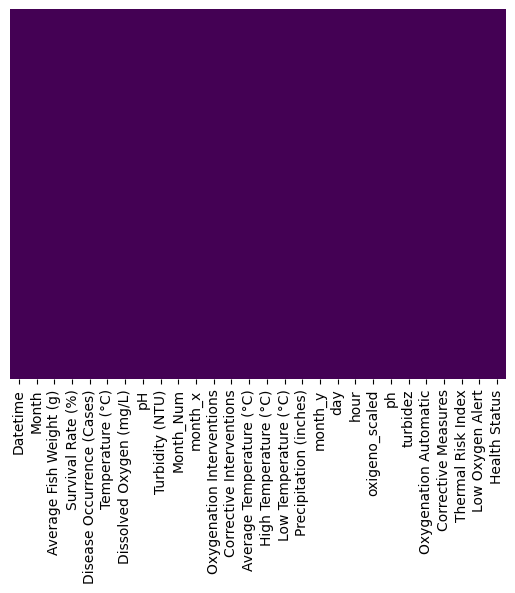

In [14]:
sns.heatmap(quality_df.isnull(),yticklabels=False,cbar=False,cmap='viridis')
plt.show()

In [15]:
# Summary of the information
quality_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4383 entries, 0 to 4382
Data columns (total 28 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   Datetime                    4383 non-null   datetime64[ns]
 1   Month                       4383 non-null   object        
 2   Average Fish Weight (g)     4383 non-null   float64       
 3   Survival Rate (%)           4383 non-null   float64       
 4   Disease Occurrence (Cases)  4383 non-null   float64       
 5   Temperature (°C)            4383 non-null   float64       
 6   Dissolved Oxygen (mg/L)     4383 non-null   float64       
 7   pH                          4383 non-null   float64       
 8   Turbidity (NTU)             4383 non-null   float64       
 9   Month_Num                   4383 non-null   float64       
 10  month_x                     4383 non-null   float64       
 11  Oxygenation Interventions   4383 non-null   int64       